In [ ]:
##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

In [ ]:
## Read file and then sort 
csv_file = "companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date",
                                        "Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
companies_df.head(5)


In [ ]:
companies_df = companies_df[["Company Name", "Founded Date", "Closed Date", 
                             "Number of Funding Rounds", "Last Funding Date", 
                             "Last Funding Amount", "Total Funding Amount", "Status"]]
companies_df.head(5)

In [ ]:
companies_pf = companies_df.rename(columns={
    "Company Name" : "Company",
    "Number of Funding Rounds" : "Funding Rounds"   
})

companies_pf.head(5)

In [ ]:
## Read file and then sort 
funding = "Funding_Rounds.csv"
funding_df = pd.read_csv(funding, encoding="iso-8859-1", 
                         parse_dates=["Announced On Date"])
funding_df.head(5)


In [ ]:
funding_df = funding_df[["Company Name", "Funding Type", "Money Raised", 
                         "Announced On Date"]]
funding_df.head(5)

In [ ]:
funding_pf = funding_df.rename(columns={
    "Company Name" : "Company"
})

funding_pf.head()

In [ ]:
# Merge companies_pf and funding_pf on Company
merged_data = pd.merge(companies_pf, funding_pf,how="inner",on="Company")
merged_data.head(5)



In [ ]:
# Save Data to csv without index, with header
merged_data.to_csv("merged_company-funding.csv", index=False, header=True)

In [ ]:
## Read file and then sort 
org = "organizations.csv"
org_df = pd.read_csv(org, encoding="iso-8859-1")
org_df.head(5)                              

In [ ]:
# Rename columns for readability
new_file = org_df.rename(columns={
    "crunchbase_uuid": "UUID",
    "Company Name" : "Company",
    "homepage_url" : "Homepage"   
})

new_file.head(5)

In [ ]:
new_file = new_file[["UUID", "Company", "Homepage"]]
new_file.head()


In [ ]:
# Save Data to csv without index, with header
new_file.to_csv("new_file-org.csv", index=False, header=True)

In [ ]:
merged_df = pd.merge(merged_data, new_file,how="inner",on="Company")
merged_df.head(5)

In [ ]:
# Save Data to csv without index, with header
merged_df.to_csv("merged_company-funding-org.csv", index=False, header=True)

In [ ]:
# works
for i, el in enumerate(merged_df.iterrows()):
    val = el[1]['UUID'].replace("-", "")
    merged_df.set_value(i, "UUID", val)
merged_df.head(5)

In [ ]:
status = merged_df.groupby('Funding Type')["Status"].value_counts()

#g1 = df1.groupby(["Name", "City"], as_index=False).count()

status.head(10)

In [ ]:
df1 = pd.DataFrame(status).rename(columns={
    'Status':'Count'})

df1.head(20)

In [ ]:
series_d = merged_df[merged_df['Funding Type'] == "Series D"]
series_d

In [ ]:
funding_df = merged_df[merged_df['Funding Type'] == "Seed"]
funding_df

In [ ]:
seed = merged_df[merged_df['Status'] == "Was Acquired"].count
seed_df = merged_df[merged_df['Funding Type'] == "Seed"]

seed_df = seed_df[seed_df['Status'] == "Was Acquired"]

seed_df

In [ ]:
# # Build a scatter plot for each data type
# plt.scatter(seed_df["Funding Type"], 
#             seed_df["Status"],
#             s=100, edgecolor="black", linewidths=1, c="red", marker="o", 
#             alpha=0.8)

# # Incorporate the other graph properties
# plt.title("Funding Type Status")
# plt.ylabel("Funding Type")
# plt.xlabel("Status")
# plt.grid(True)

# # Save the figure
# plt.savefig("funding_type_scatter_chart.png")

# # Show plot
# plt.show()

In [ ]:
# #seed = merged_df[merged_df['Status'] == "Operating"]
# seed = merged_df[merged_df['Status'] == "Was Acquired"]
# seed = merged_df[merged_df['Status'] == "Closed"]
# seed = merged_df[merged_df['Status'] == "IPO"]

# # # x-axis
# seed_operating = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_acquired = seed.groupby(["Status"]).count()["Was Acquired"]

# # # x-axis
# seed_closedt = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_ips = seed.groupby(["Status"]).count()["IPO"]

# # # # x-axis
# # rural_ride_count = rural_cities.groupby(["city"]).count()["fare"]
# # # #y-axis
# # rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# # # # x-axis
# # suburban_ride_count = suburban_cities.groupby(["city"]).count()["fare"]
# # # #y-axis
# # suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]


In [ ]:
funding_sum = merged_df.groupby('Funding Type')["Money Raised"].sum()
funding_sum.head(10)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_sum
colors = ["gold", "green", "lightskyblue", "blue", "red"]
explode = (0, 0.05, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Average Funding for Startups")
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

# Save the figure
plt.savefig("funding_type_sum_pie_chart.png")

plt.show()

In [ ]:
# sum of counts is 10278
funding_pct = merged_df.groupby('Funding Type')["Money Raised"].count()
funding_pct.head()


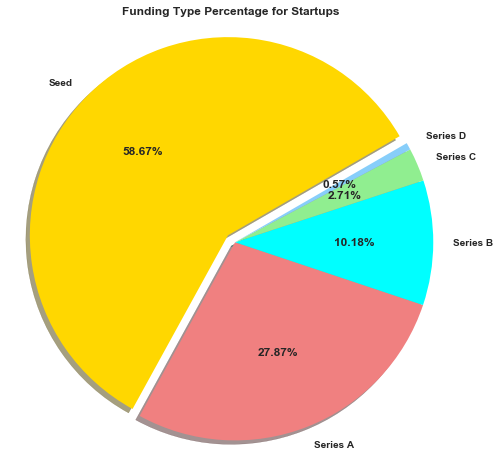

In [28]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_pct
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.05, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Percentage for Startups", weight='bold')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold'}, 
       shadow=True, startangle=30)

ax.axis("equal")

# Save the figure
plt.savefig("funding_type_count_pie_chart.png")
plt.show()